First Classfication Learning using fruits dataset

In [52]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import os
#os.chdir('Downloads')

In [63]:
#read and preview dataset
#Dataset Download link - https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt
fruits = pd.read_table('fruit_data_with_colors.csv')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [54]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
look_up_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [55]:
#get dataset overview
fruits.shape
fruits.describe().T

,count,mean,std,min,25%,50%,75%,max
fruit_label,59.0,2.542373,1.208048,1.00,1.00,3.00,4.00,4.00
mass,59.0,163.118644,55.018832,76.00,140.00,158.00,177.00,362.00
width,59.0,7.105085,0.816938,5.80,6.60,7.20,7.50,9.60
height,59.0,7.693220,1.361017,4.00,7.20,7.60,8.20,10.50
color_score,59.0,0.762881,0.076857,0.55,0.72,0.75,0.81,0.93


In [56]:
# Split the data into training and testing
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


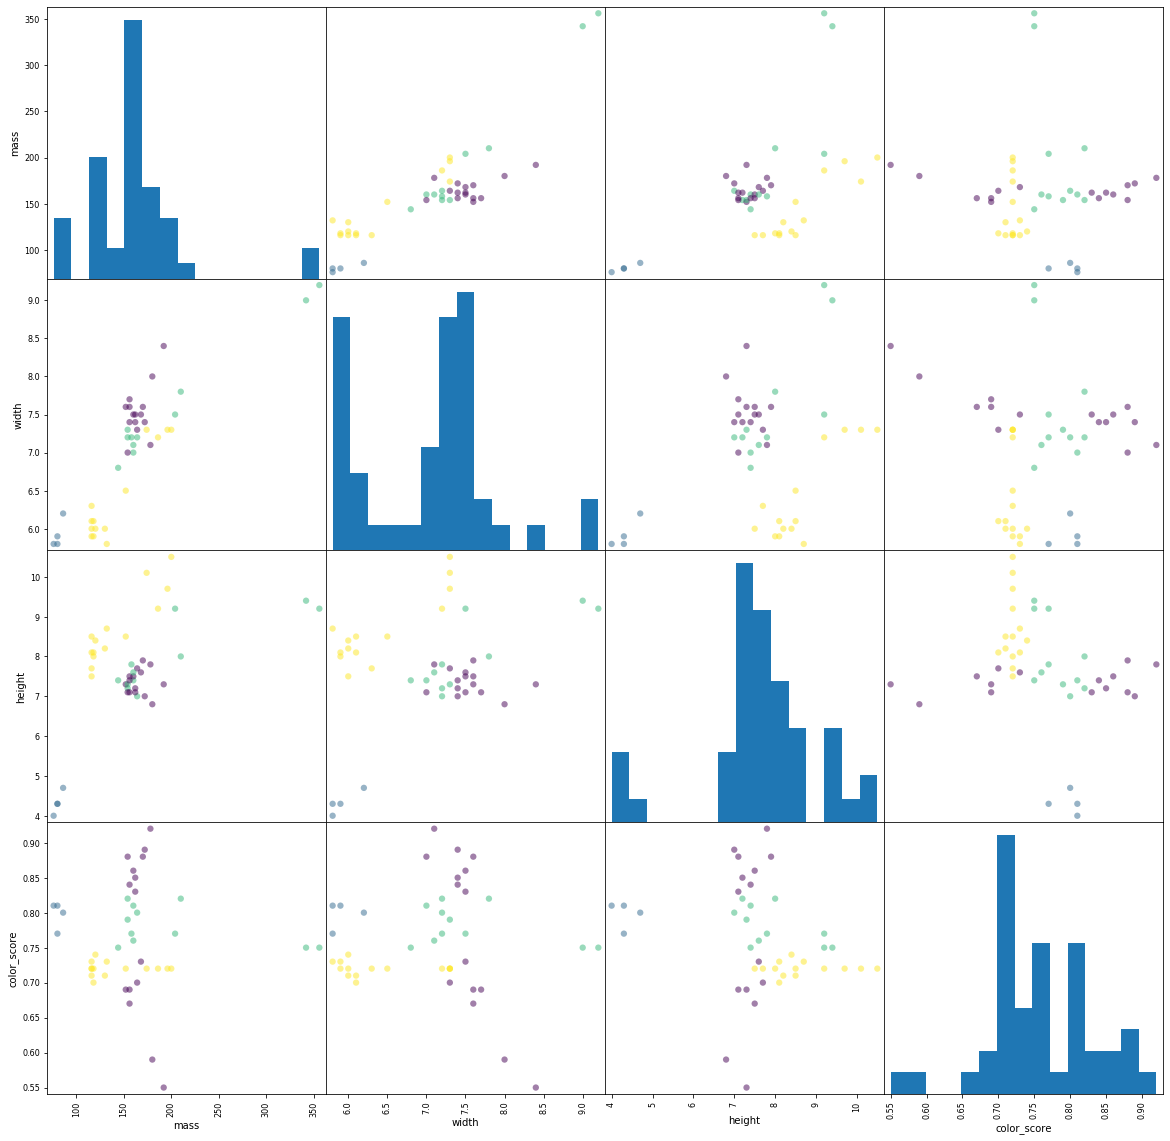

In [57]:
# plotting a scatter matrix
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(20,20))

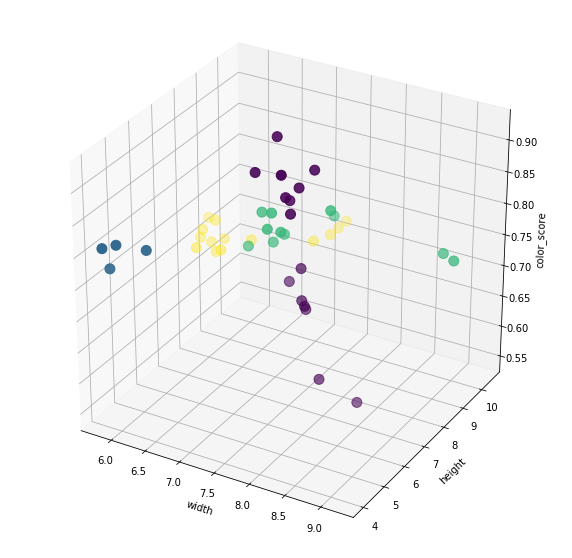

In [58]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [59]:
# Create classifier object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)

In [60]:
# Train the classifier using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [61]:
# Estimate the accuracy of the classifier on future data, using the test data
y_pred = knn.predict(X_test)

In [66]:
#print classification report to evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.50      0.75      0.60         4
          2       1.00      1.00      1.00         1
          3       0.75      0.38      0.50         8
          4       0.25      0.50      0.33         2

avg / total       0.63      0.53      0.54        15

